In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#import the dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')


In [7]:
#Data Exploration
print(df.shape)

(2216, 30)


In [8]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')


In [9]:
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0 

In [10]:
#Data Cleaning
df = df.dropna()

df = df.drop_duplicates()

df['Age'] = 2025 - df['Year_Birth']

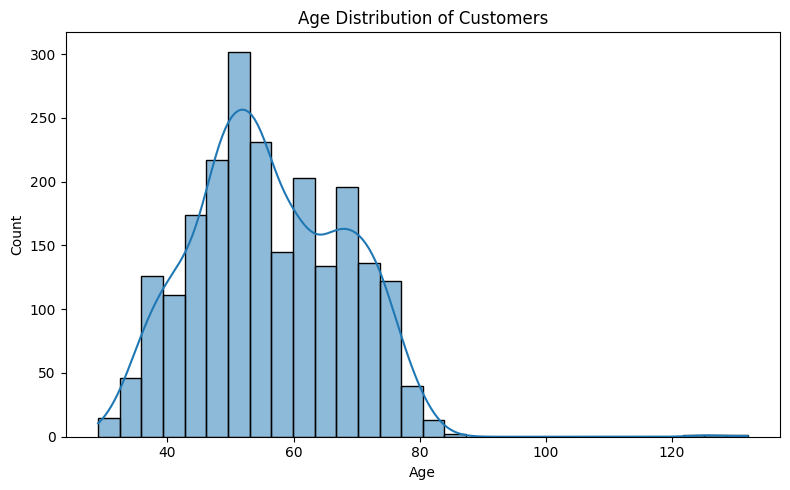

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


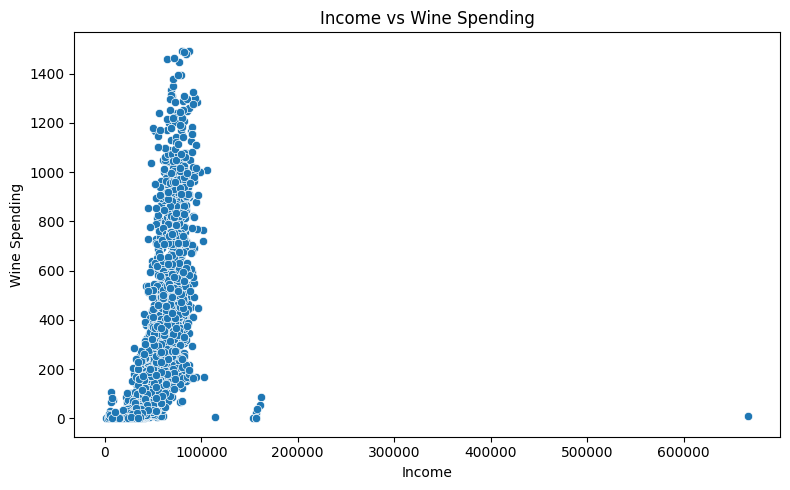

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Income', y='MntWines')
plt.title('Income vs Wine Spending')
plt.xlabel('Income')
plt.ylabel('Wine Spending')
plt.tight_layout()
plt.show()


In [14]:
#Feature Selection for Clustering
features = df[['Income', 'MntWines', 'MntFruits', 'MntGoldProds']]


In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


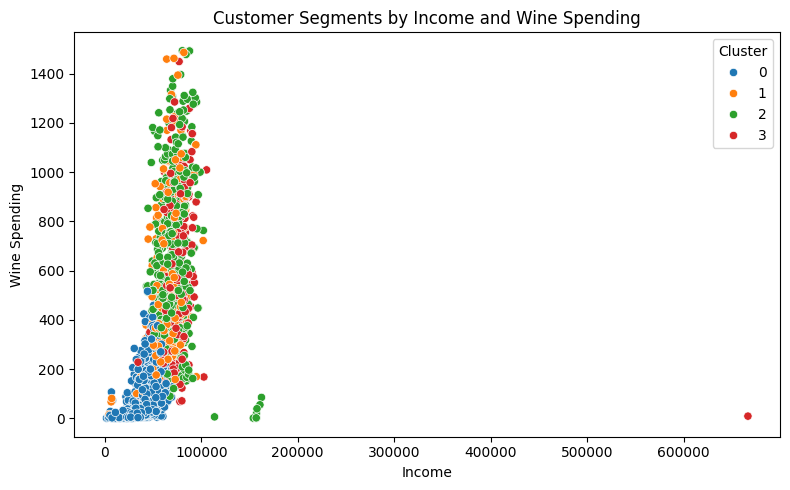

In [17]:
#visualize clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Income'], y=df['MntWines'], hue=df['Cluster'], palette='tab10')
plt.title('Customer Segments by Income and Wine Spending')
plt.xlabel('Income')
plt.ylabel('Wine Spending')
plt.tight_layout()
plt.show()
